<a href="https://colab.research.google.com/github/pi-mishra/BCG-Data-science-and-analytics-internship/blob/main/BCG_FeatureEngineering_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages


import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BCG_data/clean_data_after_eda.csv')

In [ ]:
df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,avg_variable_price,avg_fixed_price,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.097356,26.065205,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.052244,14.770458,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.086311,14.795150,0
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.050403,14.800088,0
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.100226,27.125437,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'avg_variable_price', 'avg_fixed_price', 'churn'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'avg_variable_price', 'avg_fixed_price', 'churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

## Outlier Treatment

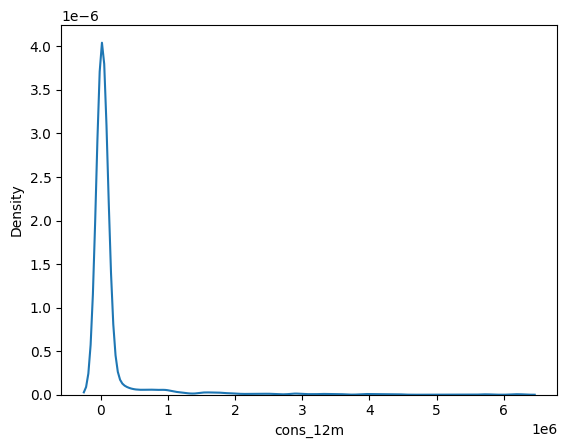

<Figure size 1000x600 with 0 Axes>

Skewness cons_12m : 5.997308122068939


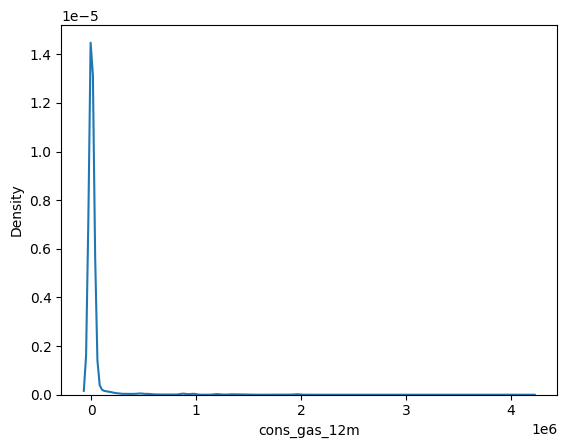

<Figure size 1000x600 with 0 Axes>

Skewness cons_gas_12m : 9.59752998980867


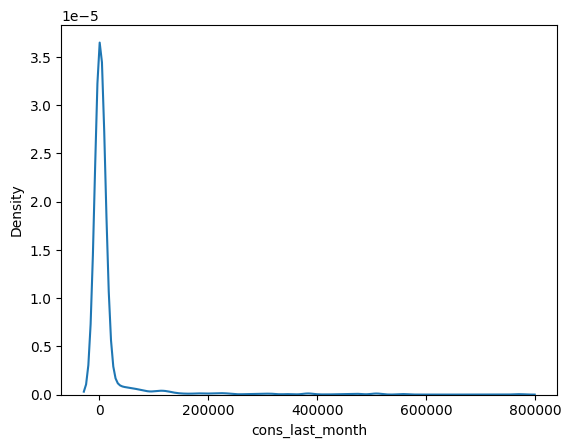

<Figure size 1000x600 with 0 Axes>

Skewness cons_last_month : 6.391406974903164


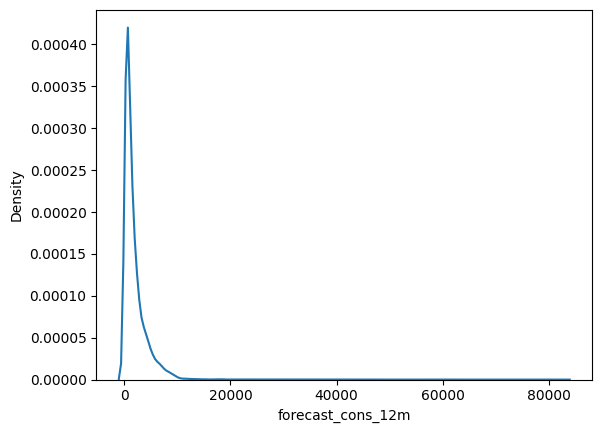

<Figure size 1000x600 with 0 Axes>

Skewness forecast_cons_12m : 7.155852615615487


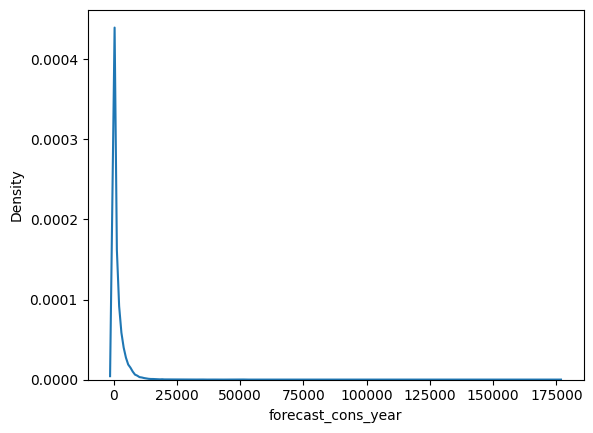

<Figure size 1000x600 with 0 Axes>

Skewness forecast_cons_year : 16.587989682280156


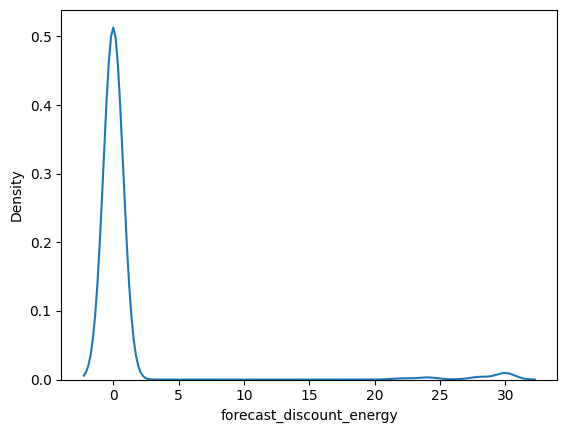

<Figure size 1000x600 with 0 Axes>

Skewness forecast_discount_energy : 5.155098289065647


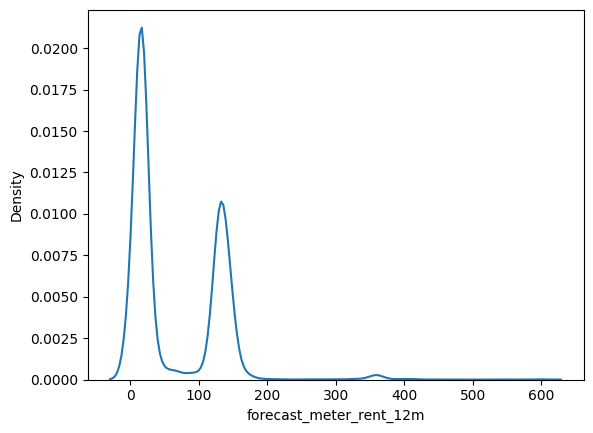

<Figure size 1000x600 with 0 Axes>

Skewness forecast_meter_rent_12m : 1.5051478520584571


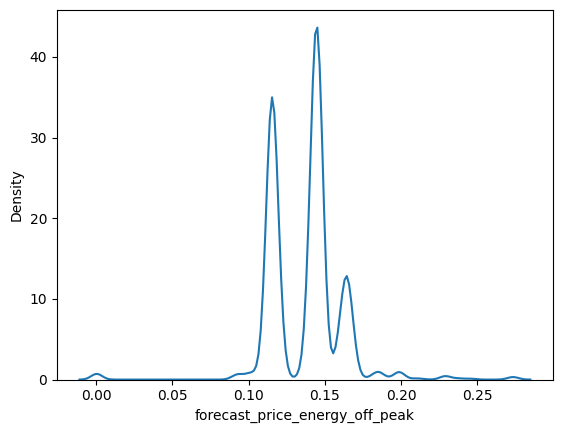

<Figure size 1000x600 with 0 Axes>

Skewness forecast_price_energy_off_peak : -0.11958602474988272


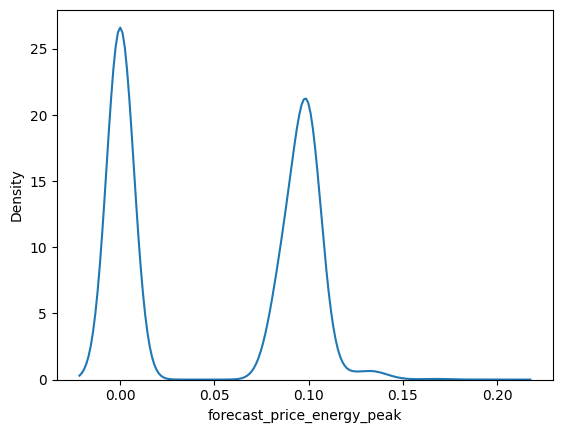

<Figure size 1000x600 with 0 Axes>

Skewness forecast_price_energy_peak : -0.014331427861824115


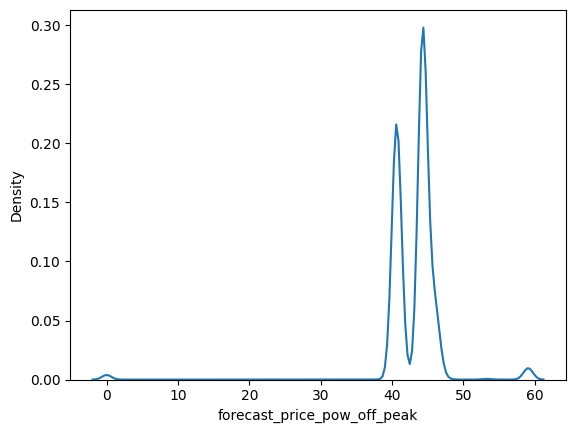

<Figure size 1000x600 with 0 Axes>

Skewness forecast_price_pow_off_peak : -4.998771993850156


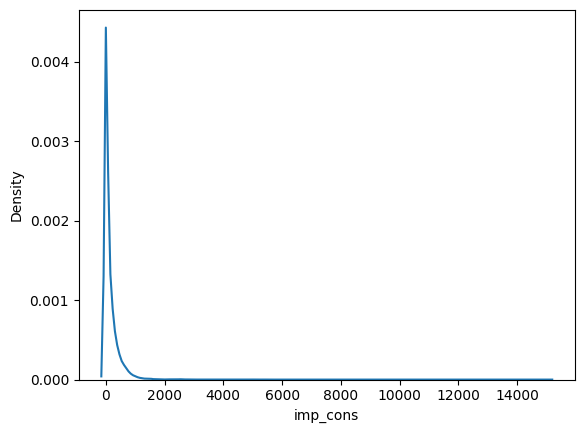

<Figure size 1000x600 with 0 Axes>

Skewness imp_cons : 13.19879897169991


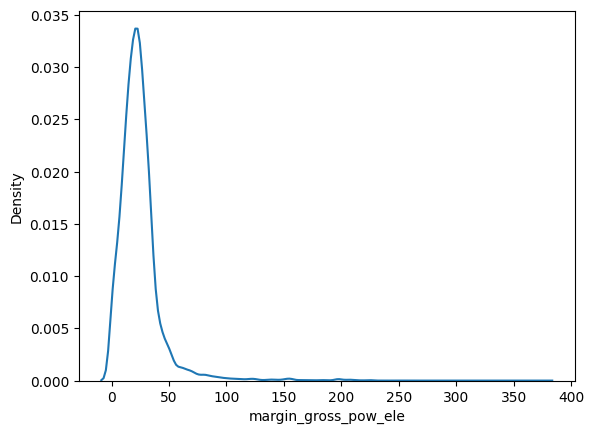

<Figure size 1000x600 with 0 Axes>

Skewness margin_gross_pow_ele : 4.472632134993316


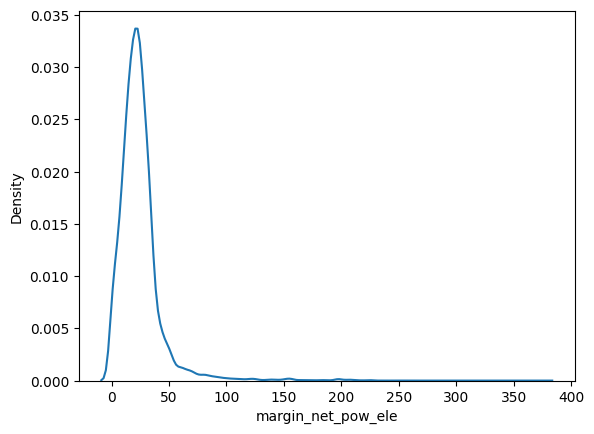

<Figure size 1000x600 with 0 Axes>

Skewness margin_net_pow_ele : 4.473325821517542


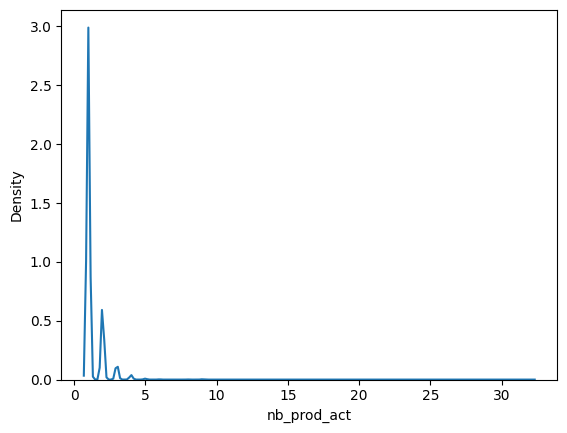

<Figure size 1000x600 with 0 Axes>

Skewness nb_prod_act : 8.636877937187974


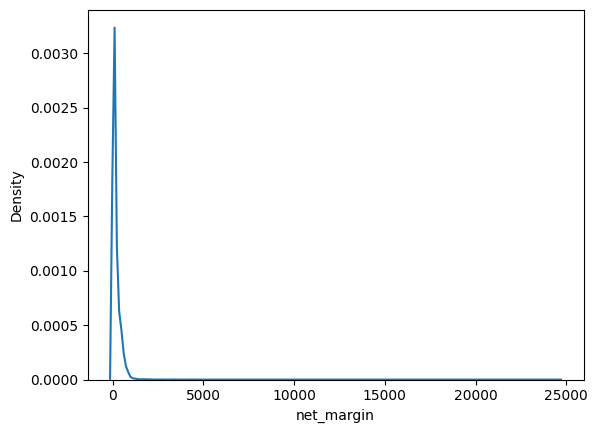

<Figure size 1000x600 with 0 Axes>

Skewness net_margin : 36.56951466408974


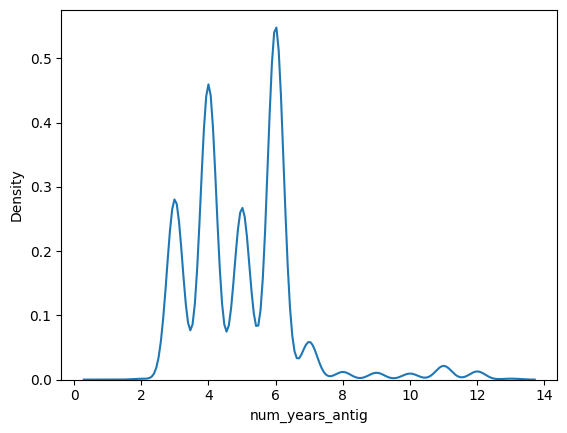

<Figure size 1000x600 with 0 Axes>

Skewness num_years_antig : 1.4462138232506747


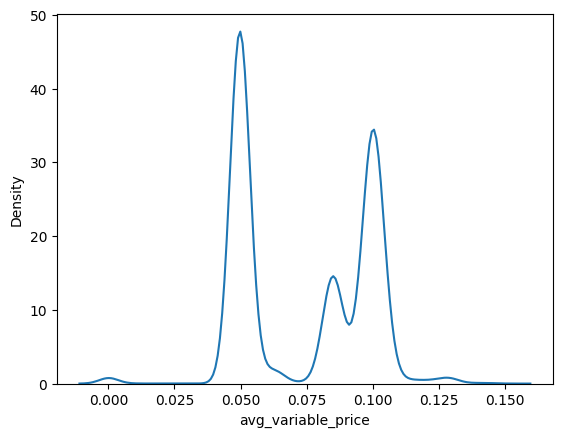

<Figure size 1000x600 with 0 Axes>

Skewness avg_variable_price : -0.04885678704842013


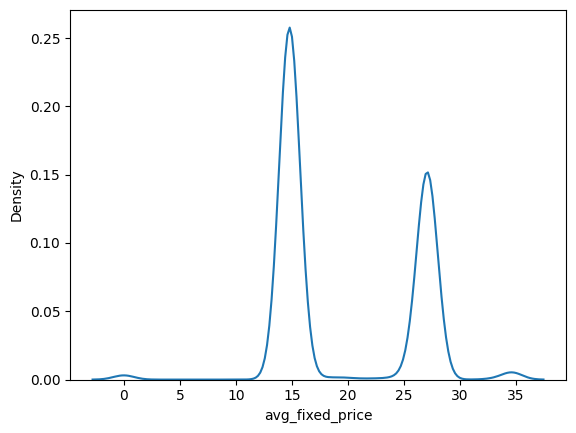

<Figure size 1000x600 with 0 Axes>

Skewness avg_fixed_price : 0.34660995839278314


In [ ]:

density_col = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 
      'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 
      'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 
      'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig','avg_variable_price','avg_fixed_price']

for i in density_col:
  sns.kdeplot(df[i])
  plt.figure(figsize=(10, 6))
  plt.show()
  skewness = df[i].skew()
  print('Skewness',i,':', skewness)

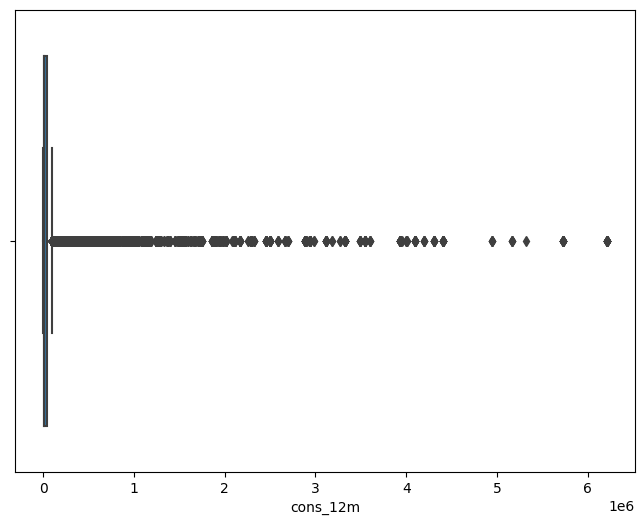

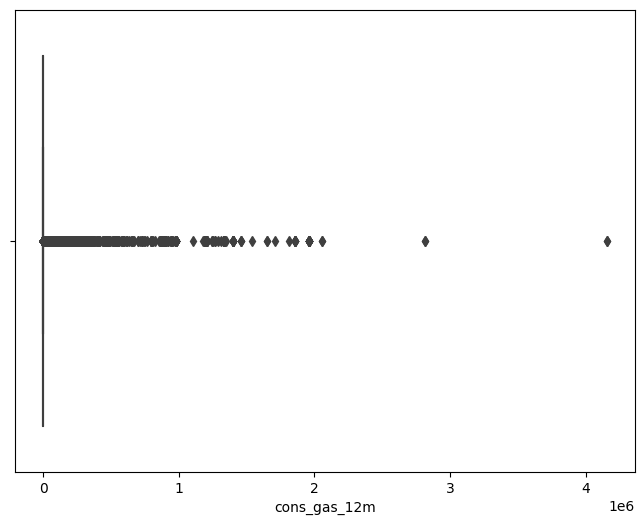

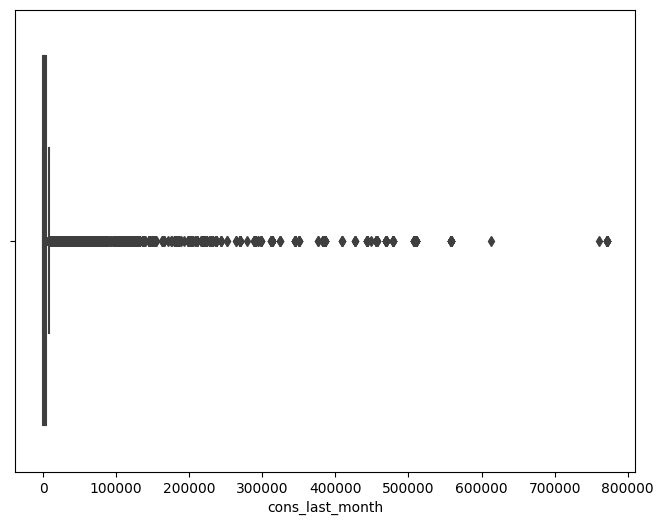

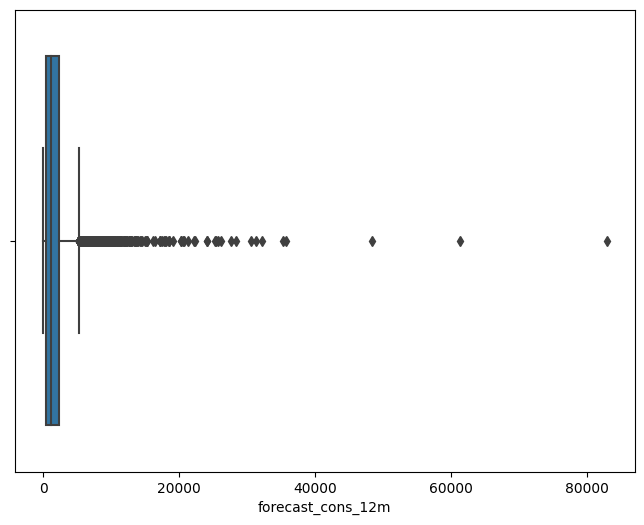

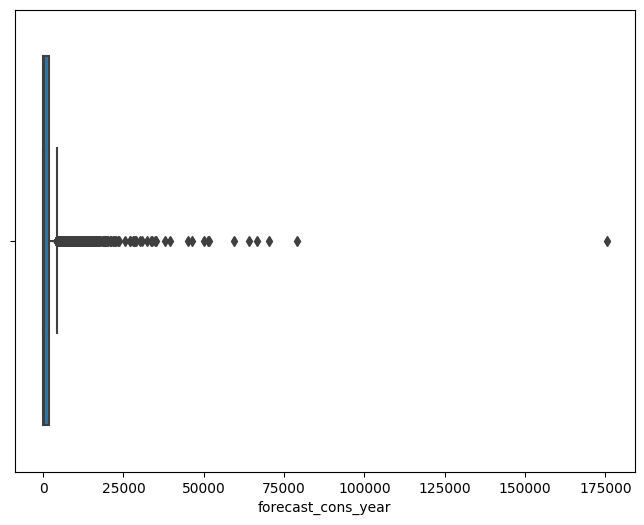

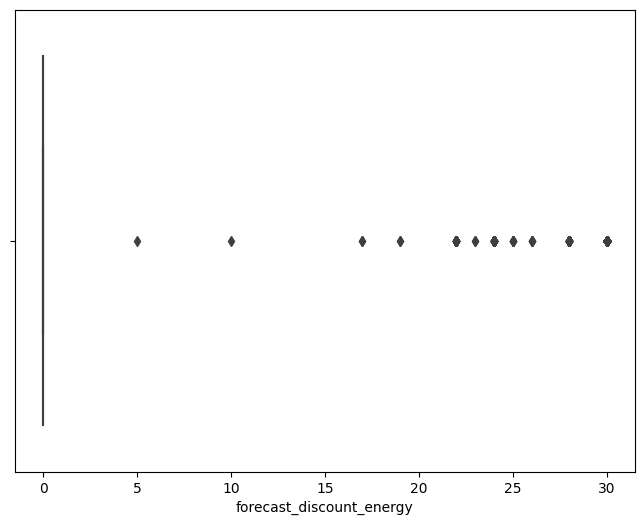

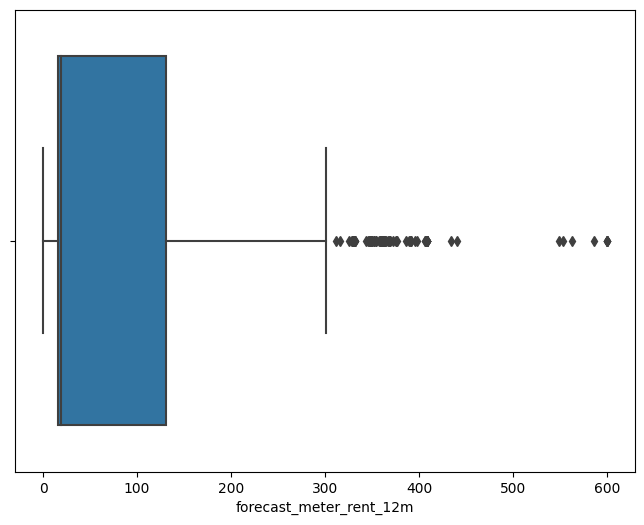

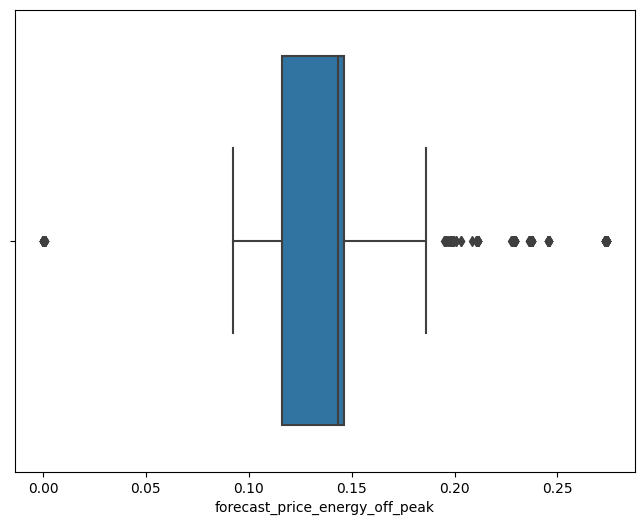

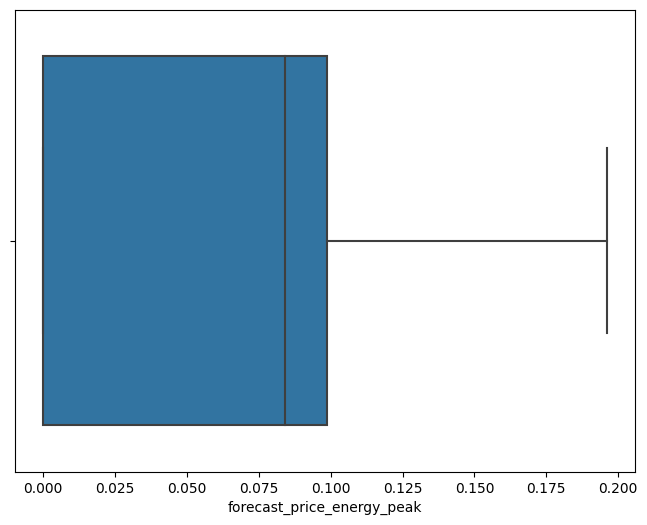

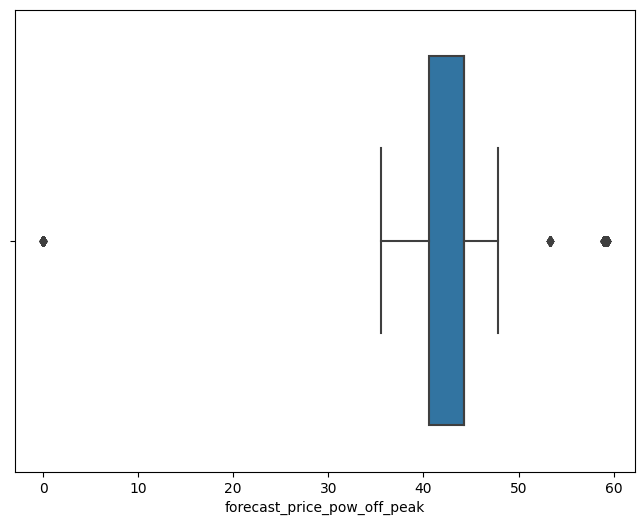

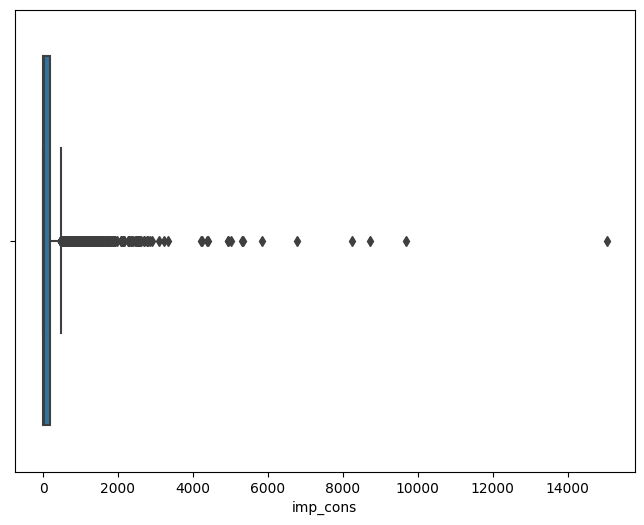

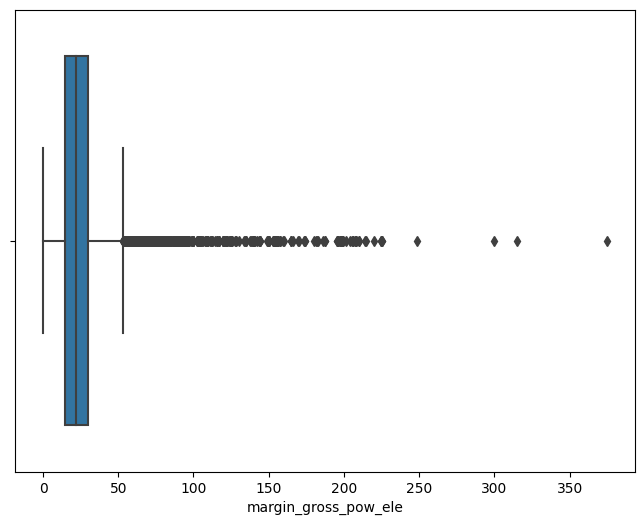

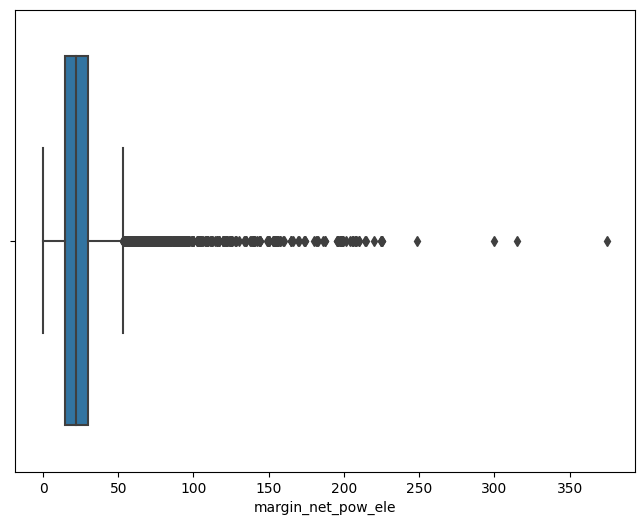

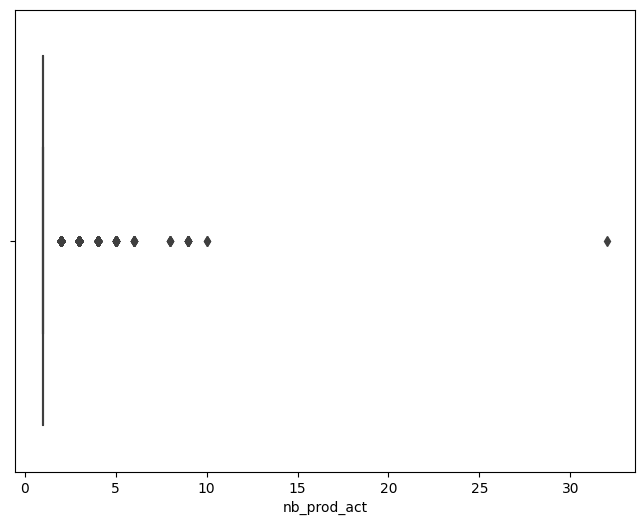

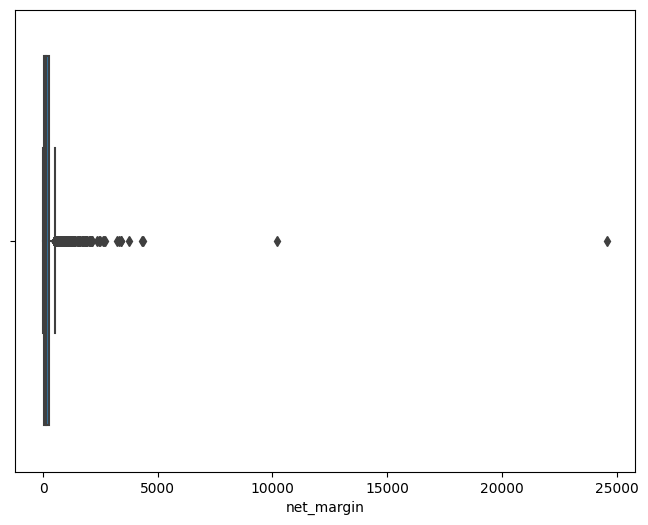

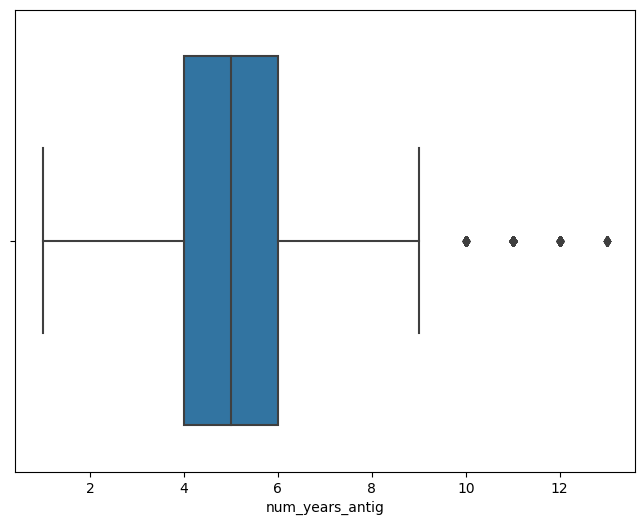

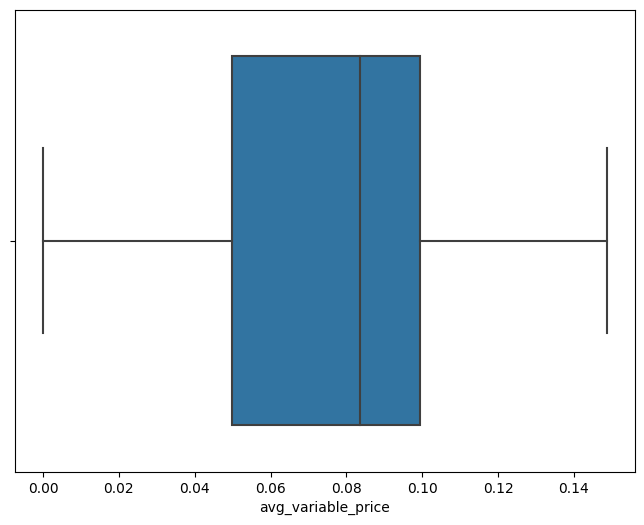

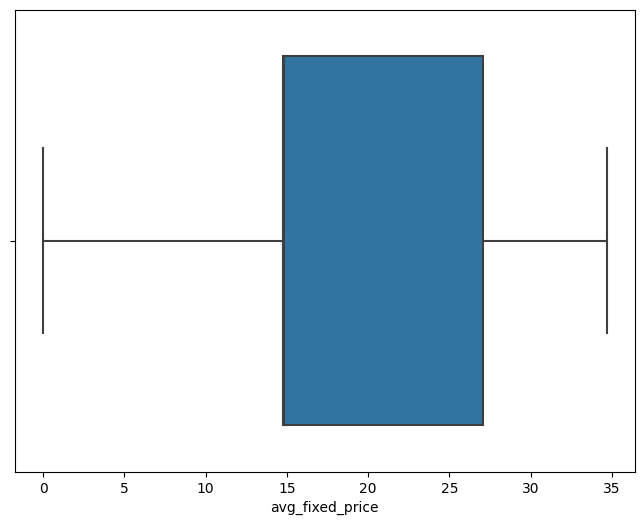

In [ ]:
for i in density_col:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[i])
  plt.show()

In [ ]:
df[density_col].describe().round(2)


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,avg_variable_price,avg_fixed_price
count,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00
mean,159220.29,28092.38,16090.27,1868.61,1399.76,0.97,63.09,0.14,0.05,43.13,152.79,24.57,24.56,1.29,189.26,5.00,0.07,19.50
std,573465.26,162973.06,64364.20,2387.57,3247.79,5.11,66.17,0.02,0.05,4.49,341.37,20.23,20.23,0.71,311.80,1.61,0.02,6.33
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
25%,5674.75,0.00,0.00,495.00,0.00,0.00,16.18,0.12,0.00,40.61,0.00,14.28,14.28,1.00,50.71,4.00,0.05,14.78
50%,14115.50,0.00,792.50,1112.88,314.00,0.00,18.80,0.14,0.08,44.31,37.39,21.64,21.64,1.00,112.53,5.00,0.08,14.80
75%,40763.75,0.00,3383.00,2401.79,1745.75,0.00,131.03,0.15,0.10,44.31,193.98,29.88,29.88,1.00,243.10,6.00,0.10,27.08
max,6207104.00,4154590.00,771203.00,82902.83,175375.00,30.00,599.31,0.27,0.20,59.27,15042.79,374.64,374.64,32.00,24570.65,13.00,0.15,34.68


In [ ]:
limits_dict = {}

for i in density_col:
    p_tile25 = df[i].quantile(0.25)
    p_tile75 = df[i].quantile(0.75)
    iqr = p_tile75 - p_tile25
    upper_limit = p_tile75 + 1.5 * iqr
    lower_limit = p_tile25 - 1.5 * iqr

    limits_dict[f"Lower Limit {i}"] = lower_limit
    limits_dict[f"Upper Limit {i}"] = upper_limit

print(limits_dict)

{'Lower Limit cons_12m': -46958.75, 'Upper Limit cons_12m': 93397.25, 'Lower Limit cons_gas_12m': 0.0, 'Upper Limit cons_gas_12m': 0.0, 'Lower Limit cons_last_month': -5074.5, 'Upper Limit cons_last_month': 8457.5, 'Lower Limit forecast_cons_12m': -2365.1975, 'Upper Limit forecast_cons_12m': 5261.9825, 'Lower Limit forecast_cons_year': -2618.625, 'Upper Limit forecast_cons_year': 4364.375, 'Lower Limit forecast_discount_energy': 0.0, 'Upper Limit forecast_discount_energy': 0.0, 'Lower Limit forecast_meter_rent_12m': -156.09499999999997, 'Upper Limit forecast_meter_rent_12m': 303.30499999999995, 'Lower Limit forecast_price_energy_off_peak': 0.07132799999999999, 'Upper Limit forecast_price_energy_off_peak': 0.19136000000000003, 'Lower Limit forecast_price_energy_peak': -0.14825549999999998, 'Upper Limit forecast_price_energy_peak': 0.2470925, 'Lower Limit forecast_price_pow_off_peak': 35.04968556, 'Upper Limit forecast_price_pow_off_peak': 49.8683934, 'Lower Limit imp_cons': -290.97, 'Up

In [ ]:
limits_dict

{'Lower Limit cons_12m': -46958.75,
 'Upper Limit cons_12m': 93397.25,
 'Lower Limit cons_gas_12m': 0.0,
 'Upper Limit cons_gas_12m': 0.0,
 'Lower Limit cons_last_month': -5074.5,
 'Upper Limit cons_last_month': 8457.5,
 'Lower Limit forecast_cons_12m': -2365.1975,
 'Upper Limit forecast_cons_12m': 5261.9825,
 'Lower Limit forecast_cons_year': -2618.625,
 'Upper Limit forecast_cons_year': 4364.375,
 'Lower Limit forecast_discount_energy': 0.0,
 'Upper Limit forecast_discount_energy': 0.0,
 'Lower Limit forecast_meter_rent_12m': -156.09499999999997,
 'Upper Limit forecast_meter_rent_12m': 303.30499999999995,
 'Lower Limit forecast_price_energy_off_peak': 0.07132799999999999,
 'Upper Limit forecast_price_energy_off_peak': 0.19136000000000003,
 'Lower Limit forecast_price_energy_peak': -0.14825549999999998,
 'Upper Limit forecast_price_energy_peak': 0.2470925,
 'Lower Limit forecast_price_pow_off_peak': 35.04968556,
 'Upper Limit forecast_price_pow_off_peak': 49.8683934,
 'Lower Limit imp

In [ ]:
new_df = df.copy()

for i in density_col:
    lower_limit = limits_dict[f"Lower Limit {i}"]
    upper_limit = limits_dict[f"Upper Limit {i}"]

    new_df[i] = np.where(
        new_df[i] > upper_limit,
        upper_limit,
        np.where(
            new_df[i] < lower_limit,
            lower_limit,
            new_df[i]
        )
    )

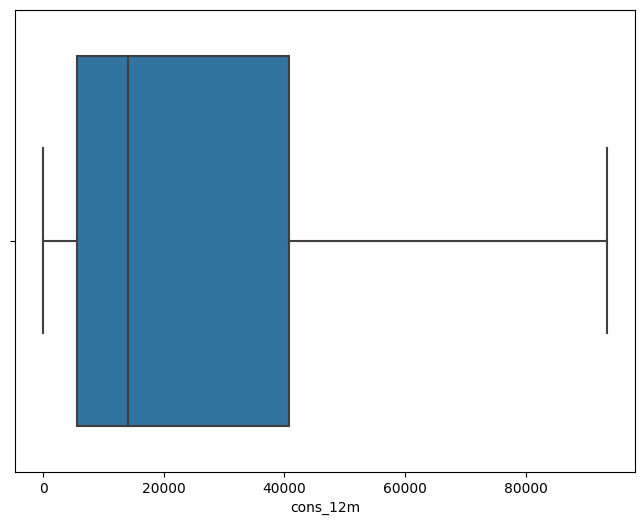

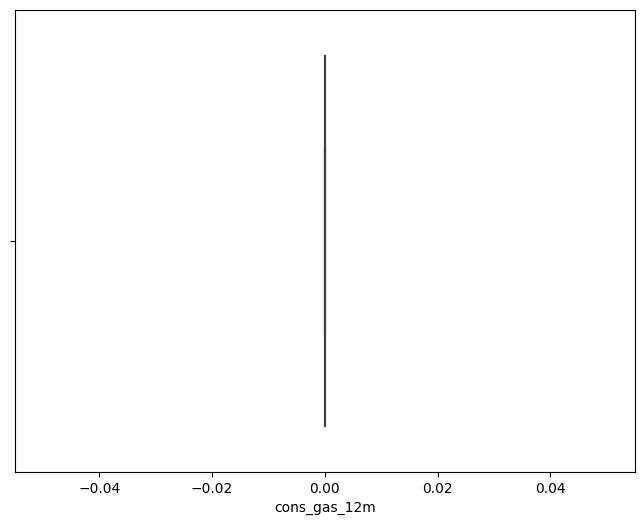

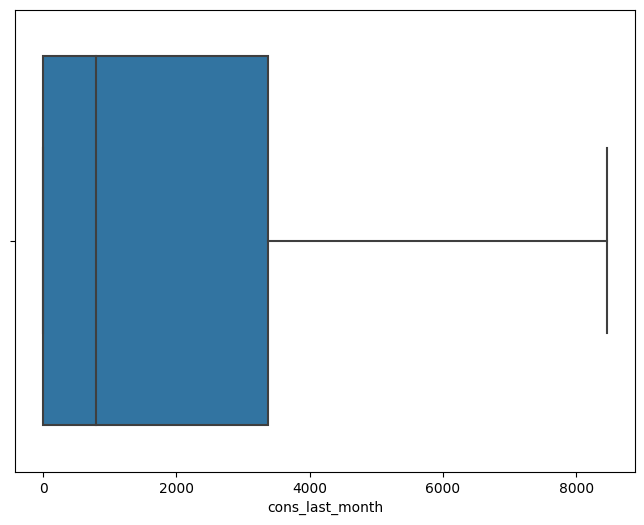

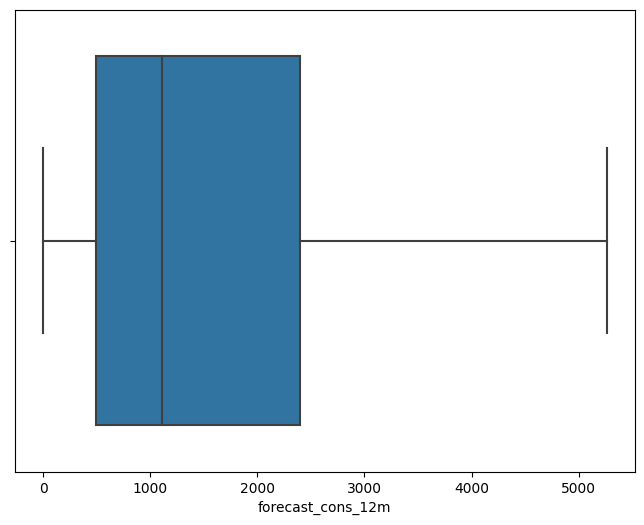

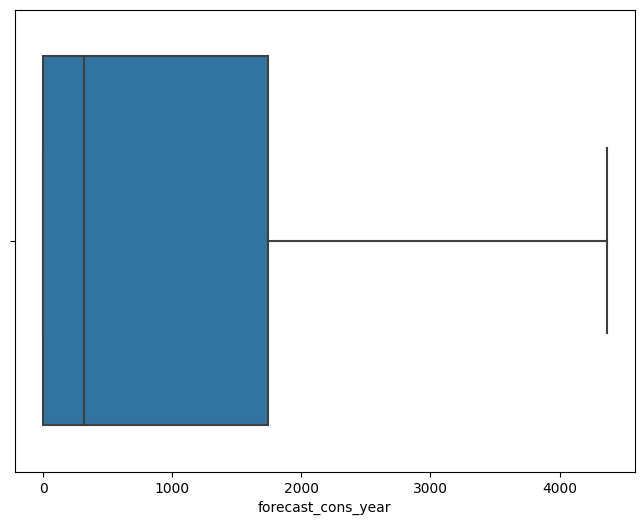

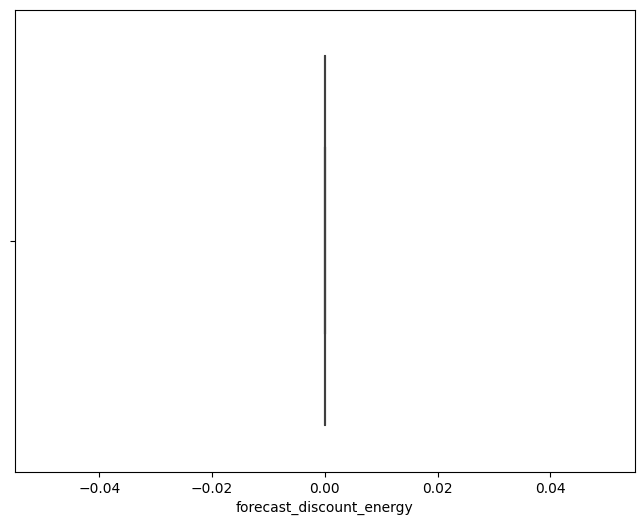

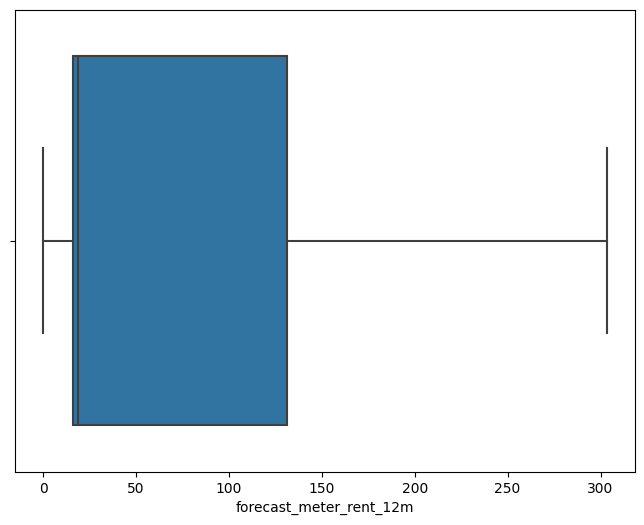

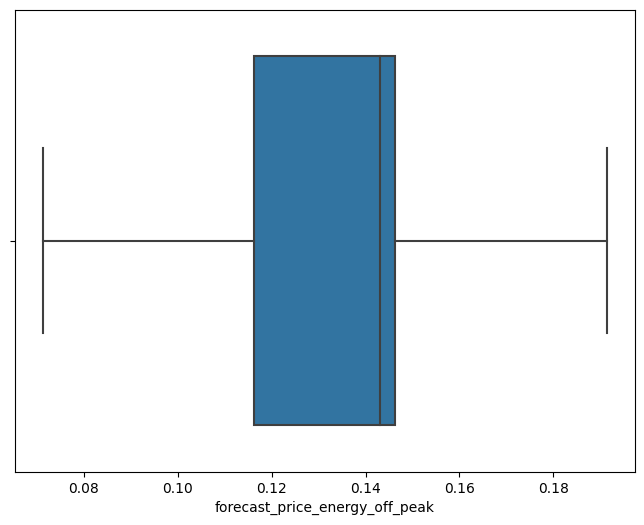

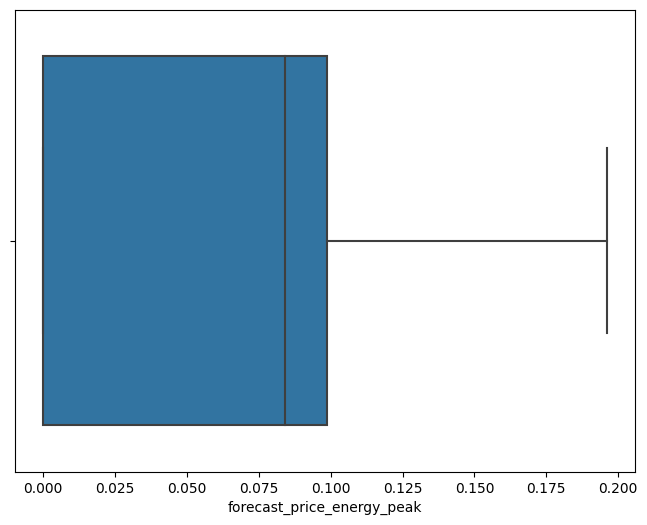

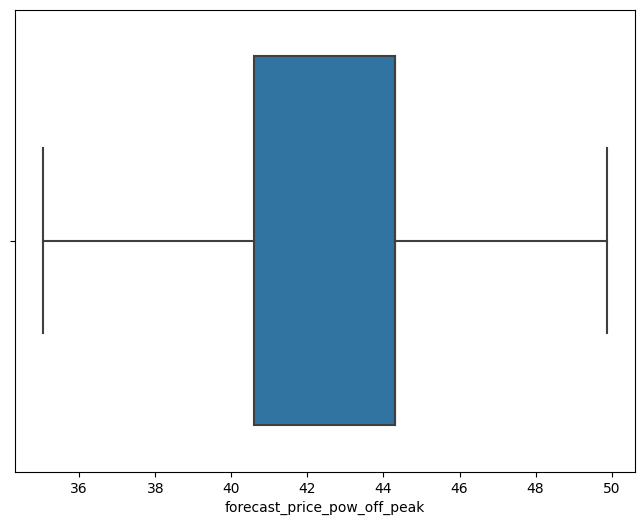

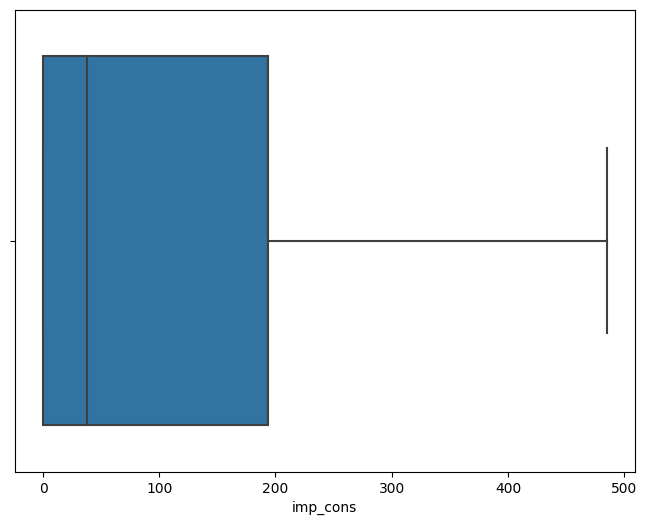

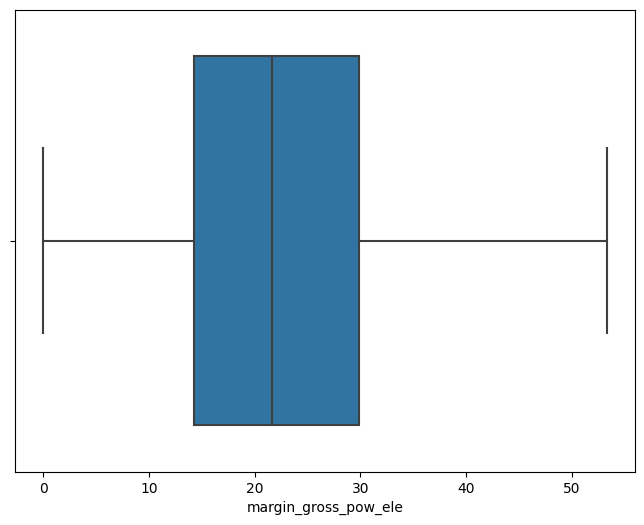

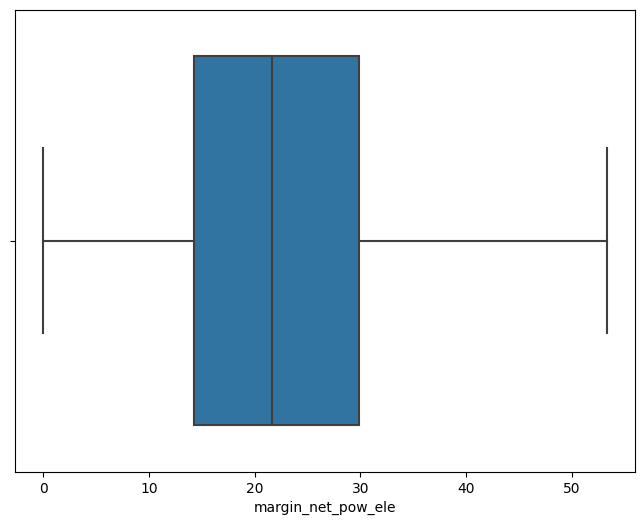

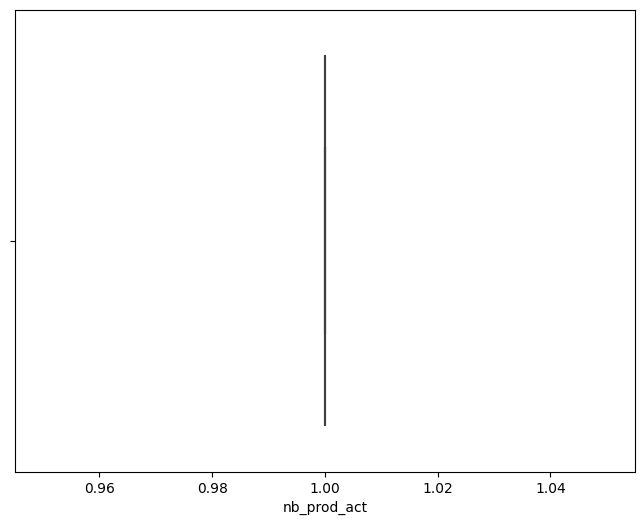

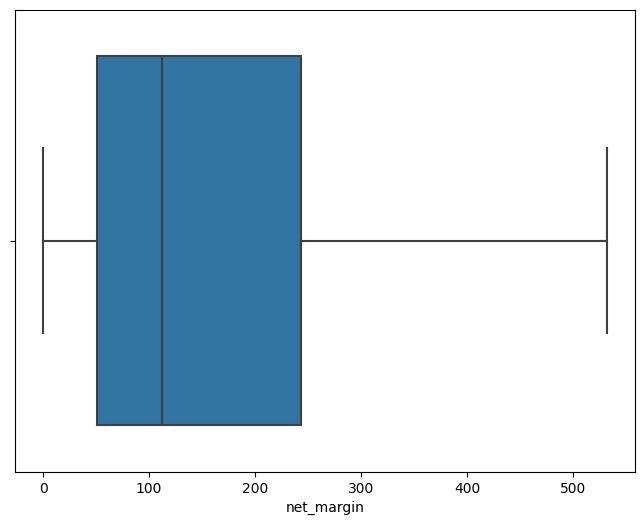

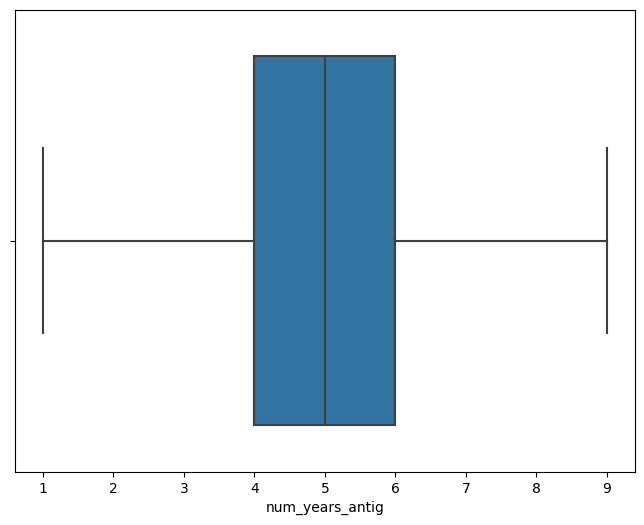

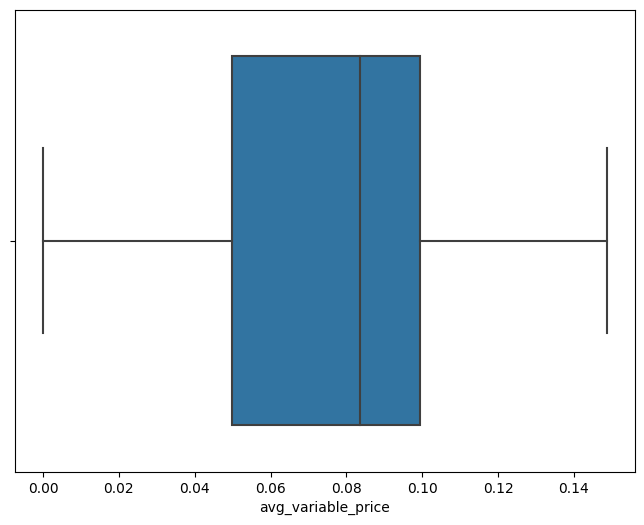

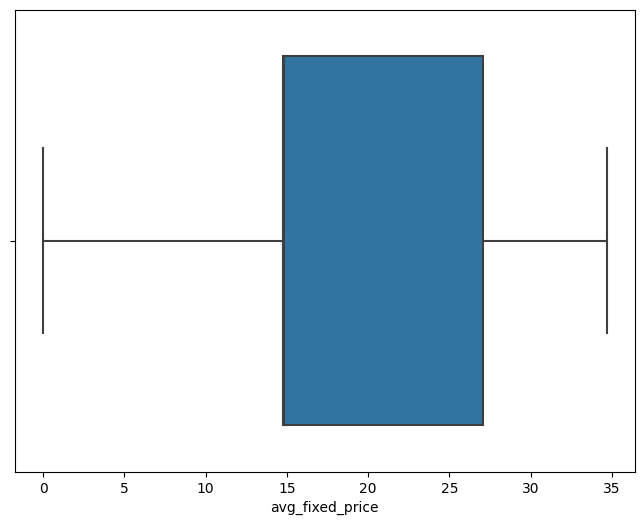

In [ ]:
for i in density_col:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=new_df[i])
  plt.show()

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  float64
 3   cons_gas_12m                    14606 non-null  float64
 4   cons_last_month                 14606 non-null  float64
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  float64
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         